# Homework Sheet No. 1
Due Date: May 17th, 2022
### Submitted by 
- Cholin Kim (1133547)
- Philipp Gehring (114946)
- Lukas Heimann ()



In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

using TestImages
using ImageFiltering
using OffsetArrays
using JLD2
using Plots
using ImageView

  Activating project at `C:\Users\choli\Desktop\Vision in Man and Machine\material\material`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing C:\Users\choli\Desktop\Vision in Man and Machine\material\material\Manifest.toml:0


# Excercise 1.1
## Code

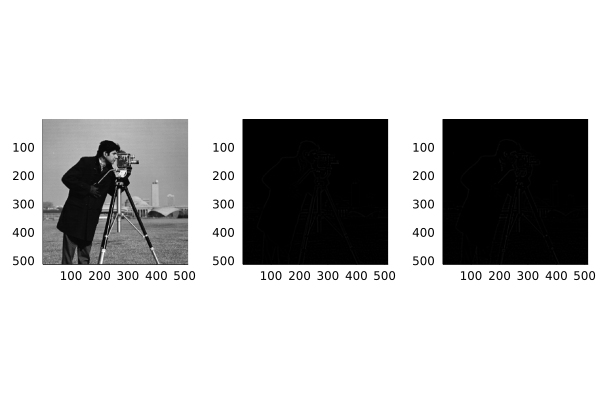

In [2]:
function filter_image(img, kernel)
    img_filtered = imfilter(img, kernel)
    return max.(img_filtered, 0), max.(-img_filtered, 0)
end

img = testimage("cameraman")

img₊, img₋ = filter_image(img, Kernel.LoG(2))

p_img_g = plot(Gray.(img))
p_img_gp = plot(Gray.(img₊))
p_img_gm = plot(Gray.(img₋))

plot(p_img_g, p_img_gp, p_img_gm, layout=(1, 3))

## Description
The original image is on the left. This image was filtered with a Laplacian of Gaussian (LoG) kernel and a maximum or minimum filter. On-center, off surround neurons is expressed by maximum filter and vice versa.

# Exercise 1.2
## Code

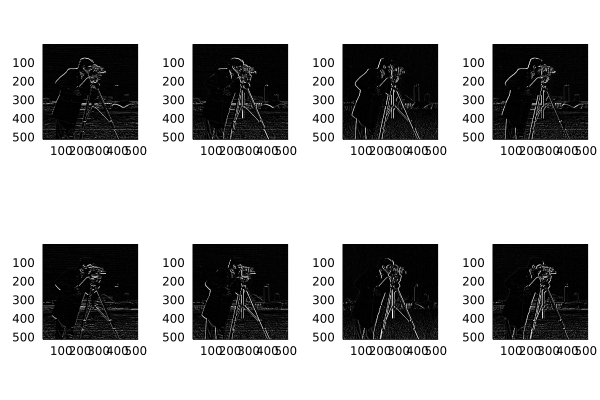

In [4]:
# Exercise 1.2
k_1 = OffsetArrays.centered([1 2 1; 0 0 0; -1 -2 -1]) # |
k_2 = OffsetArrays.centered([0 1 2; -1 0 1; -2 -1 0]) # /
k_3 = OffsetArrays.centered([1 0 -1; 2 0 -2; 1 0 -1]) # -
k_4 = OffsetArrays.centered([2 1 0; 1 0 -1; 0 -1 -2]) # \

img_1_pos, img_1_neg = filter_image(img, k_1)
img_2_pos, img_2_neg = filter_image(img, k_2)
img_3_pos, img_3_neg = filter_image(img, k_3)
img_4_pos, img_4_neg = filter_image(img, k_4)

p1 = plot(Gray.(img_1_pos), label=false)
p2 = plot(Gray.(img_2_pos), label=false)
p3 = plot(Gray.(img_3_pos), label=false)
p4 = plot(Gray.(img_4_pos), label=false)

p5 = plot(Gray.(img_1_neg), label=false)
p6 = plot(Gray.(img_2_neg), label=false)
p7 = plot(Gray.(img_3_neg), label=false)
p8 = plot(Gray.(img_4_neg), label=false)

plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(2, 4))


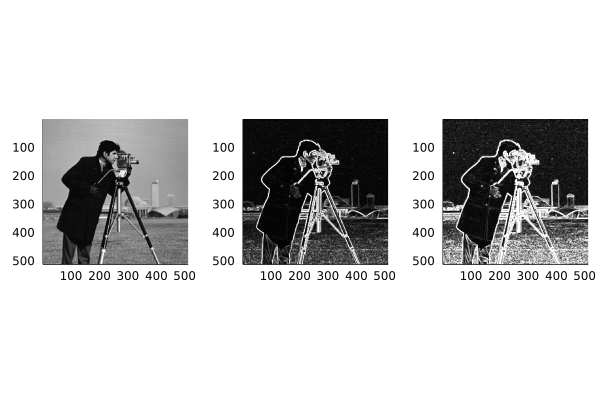

In [5]:
img_max = max.(img_1_pos, img_2_pos, img_3_pos, img_4_pos, img_1_neg, img_2_neg, img_3_neg, img_4_neg)
img_sum = img_1_pos .+ img_2_pos .+ img_3_pos .+ img_4_pos .+ img_1_neg .+ img_2_neg .+ img_3_neg .+ img_4_neg

plot(
    plot(img, label=false),
    plot(Gray.(img_max), label=false), 
    plot(Gray.(img_sum), label=false), layout=(1, 3)
)

## Description
Local edge filters with selectivity for different contrast orientations are implemented by 4 kernels each. Sum of each responses in the 8 output channels are compared with the input image.


# Exercise 2.1
# Code

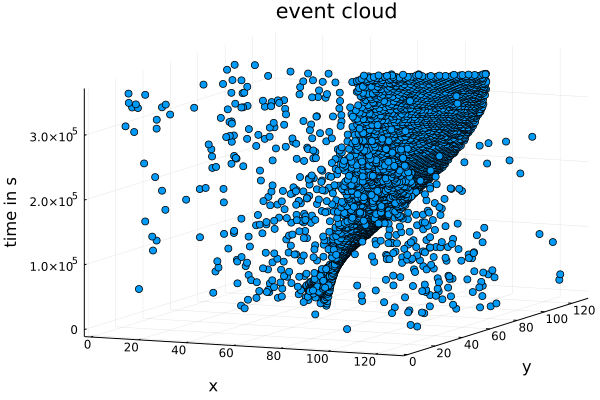

In [10]:
@load("sampleAERonlyOn.jld2")
scatter3d(x_coords, y_coords, allTs, label=false,xlabel = "x",ylabel = "y",zlabel = "time in s", title="event cloud")


## Description
The figure shows all events where a pixel has changed over the time on the z axis. This visualizes the motion of the object.


# Exercise 2.2

┌ Info: Saved animation to 
│   fn = /Users/philipp/Dropbox/Studium/uulm/semester3/vmm/sh01/tmp.gif
└ @ Plots /Users/philipp/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/Users/philipp/Dropbox/Studium/uulm/semester3/vmm/sh01/tmp.gif")
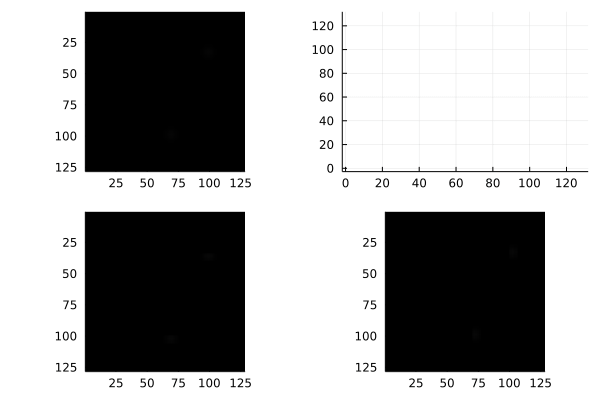

In [10]:
n_events = length(x_coords)

mhi = zeros(128, 128)
mhi[x_coords[1], y_coords[1]] += 1
anim = @animate for i in 2:n_events
    # Update the mhi such that mhi(t) = max(0, mhi(told) − (t − told) · f),
    # where t is the current timestamp and told is the time stamp of the event
    # processed in the previous iteration and f = 0.00001
    @. mhi = max(0, mhi - (allTs[i] - allTs[i-1]) * 0.00001)

    # Increase mhi by one at the location of the currently processed event
    mhi[x_coords[i], y_coords[i]] += 1

    mhi_filtered = imfilter(mhi, Kernel.gaussian(3))
    p_mhi_1 = plot(Gray.(mhi_filtered), label="false")
    p_mhi_h = plot(Gray.(imfilter(mhi_filtered, k_1)), label="false")
    p_mhi_v = plot(Gray.(imfilter(mhi_filtered, k_3)), label="false")

    Gy, Gx = imgradients(Gray.(mhi_filtered), KernelFactors.sobel)
    #=
    if i == 2
        print("size of gradients ", size(Gx), size(Gy), "\n") 
    end
    
    direction_estimated = atan.(Gy./Gx)
    g_length = sqrt.(Gx.^2 .+ Gy.^2)

    
    size_x, size_y = size(mhi_filtered)
    if i == 2
            print("size of mhi ", size(mhi_filtered), "\n") 
    end
    =#
    
    p_mhi_grad = quiver(
        x_coords[1:10:n_events],
        y_coords[1:10:n_events],
        allTs[1:10:n_events],
        quiver=(Gx[1:10:n_events], Gy[1:10:n_events])
    )
    plot(p_mhi_1, p_mhi_grad, p_mhi_h, p_mhi_v, layout=(2, 2))
end every 50

gif(anim, fps=30)

┌ Info: Saved animation to 
│   fn = C:\Users\choli\Desktop\Vision in Man and Machine\material\material\tmp.gif
└ @ Plots C:\Users\choli\.julia\packages\Plots\1KWPG\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\choli\\Desktop\\Vision in Man and Machine\\material\\material\\tmp.gif")
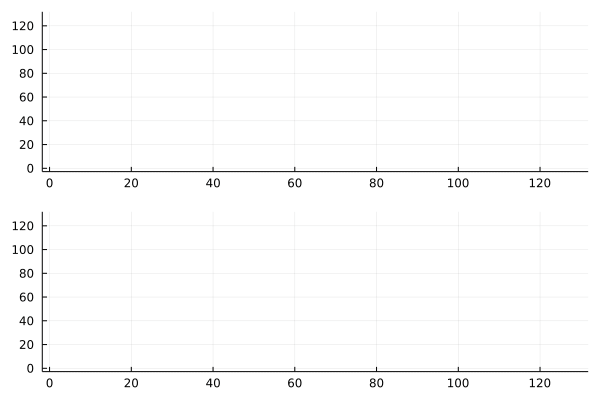

In [13]:
mhi = zeros(128, 128)
n_events = length(x_coords)
mhi[x_coords[1], y_coords[1]] += 1
anim = @animate for i in 2:n_events
    
    @. mhi = max(0, mhi - (allTs[i] - allTs[i-1]) * 0.00001)

    mhi[x_coords[i], y_coords[i]] += 1

    mhi_filtered = imfilter(mhi, Kernel.gaussian(3))
    sobel_x = imfilter(Gray.(mhi_filtered), k_3)
    sobel_y = imfilter(Gray.(mhi_filtered), k_1)
    Gx = imfilter(sobel_x, k_3)
    Gy = imfilter(sobel_y, k_1)
    
    sobel_x2 = imfilter(Gray.(mhi_filtered), reflect(k_3))
    sobel_y2 = imfilter(Gray.(mhi_filtered), reflect(k_1))
    Gx2 = imfilter(sobel_x, reflect(k_3))
    Gy2 = imfilter(sobel_y, reflect(k_1))
    
    p_mhi_grad = quiver(
        x_coords[1:10:n_events],
        y_coords[1:10:n_events], 
        quiver=(Gx[1:10:n_events], Gy[1:10:n_events])
    )
    p_mhi_grad2 = quiver(
        x_coords[1:10:n_events],
        y_coords[1:10:n_events], 
        quiver=(Gx2[1:10:n_events], Gy2[1:10:n_events])
    )

    plot(p_mhi_grad, p_mhi_grad2, layout=(2,1))

end every 50

gif(anim, fps=30)